In [2]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


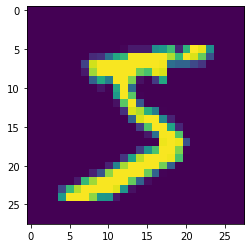

In [5]:
plt.imshow(x_train[0])

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
hist = model.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0861 - val_accuracy: 0.9786
Epoch 2/3
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.1244 - val_accuracy: 0.9709
Epoch 3/3
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.1377 - val_accuracy: 0.9738


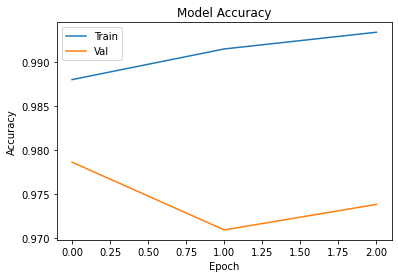

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(["Train","Val"],loc='upper left')
plt.show()

In [18]:
predictions = model.predict(x_test[:4])
predictions

array([[7.9689639e-14, 3.1635165e-22, 6.0803185e-16, 1.2033798e-13,
        3.0505185e-21, 1.6329519e-18, 5.8871476e-27, 1.0000000e+00,
        3.9507252e-12, 1.2860532e-14],
       [5.0340938e-12, 1.7186264e-18, 1.0000000e+00, 6.6392355e-17,
        2.0287838e-21, 3.6845316e-20, 4.6846632e-12, 8.1074839e-25,
        2.6883047e-15, 2.1733221e-22],
       [7.0071531e-12, 1.0000000e+00, 3.1467543e-12, 2.4894343e-16,
        6.5180883e-10, 7.3259218e-11, 3.1417631e-13, 3.8673988e-13,
        1.4953478e-08, 2.7940301e-15],
       [1.0000000e+00, 1.0078637e-20, 2.9930622e-10, 9.8127104e-18,
        2.0056348e-16, 2.2229538e-13, 5.6829055e-12, 5.5720334e-19,
        1.4206370e-14, 1.3350558e-11]], dtype=float32)

In [19]:
print(np.argmax(predictions,axis=1))
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


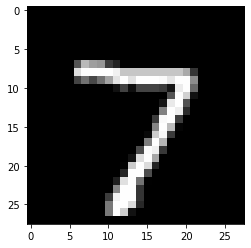

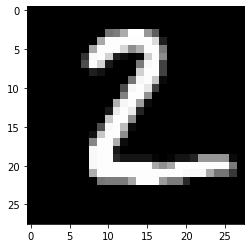

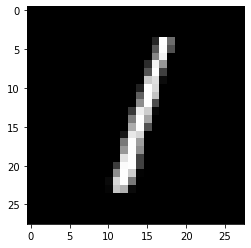

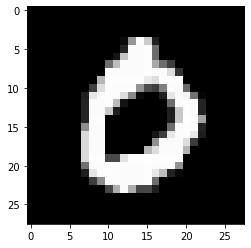

In [20]:
for i in range(0,4):
  image = x_test[i]
  image = np.array(image,dtype='float')
  pixels = image.reshape(28,28)
  plt.imshow(pixels,cmap='gray')
  plt.show()